### Imports

In [42]:
# imports

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [43]:
# Fixing some redundant warnings
pd.options.mode.chained_assignment = None  # default='warn'

# Data Cleaning

### Cleaning the Combined Dataframe

In [3]:
# read in the two combined subreddit's data

combined = pd.read_csv('../data/combined.csv', index_col = 0)
combined

,subreddit,title,created_utc,is_video,num_comments
0,cycling,Women cyclists. What do you think when the men...,1682463592,False,0
1,cycling,Inaccurate Shimano Power Meter,1682463280,False,0
2,cycling,Never been on a road bike before and WOW,1682459187,False,0
3,cycling,2012 Fuji Supreme LTD Team for 600? Good deal?,1682458960,False,0
4,cycling,bike making weird sound when biking in 1st,1682456616,False,0
...,...,...,...,...,...
994,running,Grandma's Marathon 2023,1678899332,False,1
995,running,"I’ve just started running, how many times a we...",1678897479,False,1
996,running,Running Instagram Profiles,1678895309,False,1
997,running,What are the latest justifications for why sup...,1678894757,False,1


In [4]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5998 entries, 0 to 998
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     5998 non-null   object
 1   title         5998 non-null   object
 2   created_utc   5998 non-null   int64 
 3   is_video      5998 non-null   bool  
 4   num_comments  5998 non-null   int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 240.2+ KB


In [5]:
# check for any nulls
combined.isnull().sum()

subreddit       0
title           0
created_utc     0
is_video        0
num_comments    0
dtype: int64

In [6]:
# check to see if there are any duplicates
combined.duplicated().sum()

1

In [7]:
# remove the duplicate
combined = combined.drop_duplicates()
combined.duplicated().sum()

0

In [8]:
# check to see if there any deleted reddit posts
combined['title'].value_counts()

Weekly Complaints &amp; Confessions Thread                      6
The Weekly Training Thread                                      6
Tuesday Shoesday                                                6
Run Nutrition Tuesday                                           6
Lurkers' Wednesday                                              5
                                                               ..
Best trunk bike rack for highway travel?                        1
Has anyone seen a Lemond 8 in the wild?                         1
Helmets like Giro Vanquish but available in 2023?               1
Help! Need: front fork 4:Retrospec amok                         1
How many times have you nearly been hit or injured on a run?    1
Name: title, Length: 5886, dtype: int64

In [9]:
combined['subreddit'].value_counts()

running    2999
cycling    2998
Name: subreddit, dtype: int64

---
### Cleaning Individual Subreddit Dataframes

In [10]:
# read in each subreddit individually
# look at the cycling df
cycling = pd.read_csv('../data/cycling.csv', index_col = 0)
cycling

,subreddit,title,created_utc,is_video,num_comments
0,cycling,Women cyclists. What do you think when the men...,1682463592,False,0
1,cycling,Inaccurate Shimano Power Meter,1682463280,False,0
2,cycling,Never been on a road bike before and WOW,1682459187,False,0
3,cycling,2012 Fuji Supreme LTD Team for 600? Good deal?,1682458960,False,0
4,cycling,bike making weird sound when biking in 1st,1682456616,False,0
...,...,...,...,...,...
995,cycling,Heart rate training zones,1677799731,False,0
996,cycling,Storing bike vertically on trainer,1677799606,False,0
997,cycling,Fit system is rubbing my head,1677798973,False,0
998,cycling,Why do folks hate cyclists?,1677796669,False,0


In [11]:
cycling.duplicated().sum()

1

In [12]:
# remove the duplicate
combined = combined.drop_duplicates()
combined.duplicated().sum()

0

In [13]:
# look at the running df
running = pd.read_csv('../data/running.csv', index_col = 0)
running

,subreddit,title,created_utc,is_video,num_comments
0,running,Looking to run a faster half marathon,1682463029,False,1
1,running,Crahses after half marathon over 1 week ago,1682462783,False,1
2,running,WHOOP thoughts?,1682462057,False,1
3,running,Do any of you run alot but also smoke cigarettes?,1682461439,False,1
4,running,Disrupted Training Advice Needed,1682459720,False,1
...,...,...,...,...,...
994,running,Grandma's Marathon 2023,1678899332,False,1
995,running,"I’ve just started running, how many times a we...",1678897479,False,1
996,running,Running Instagram Profiles,1678895309,False,1
997,running,What are the latest justifications for why sup...,1678894757,False,1


In [14]:
# check for duplicates
running.duplicated().sum()

0

---
# Exploratory Data Analysis

### Creating title length and word count columns

- I created two new columns, Title Length and Title Word Count, and analyzed the distributions per each subreddit.

In [15]:
combined['length'] = combined['title'].apply(len)

In [16]:
combined['word_count'] = combined['title'].apply(lambda x: len(x.split()))

### Distributions for Title Lengths and Word Counts

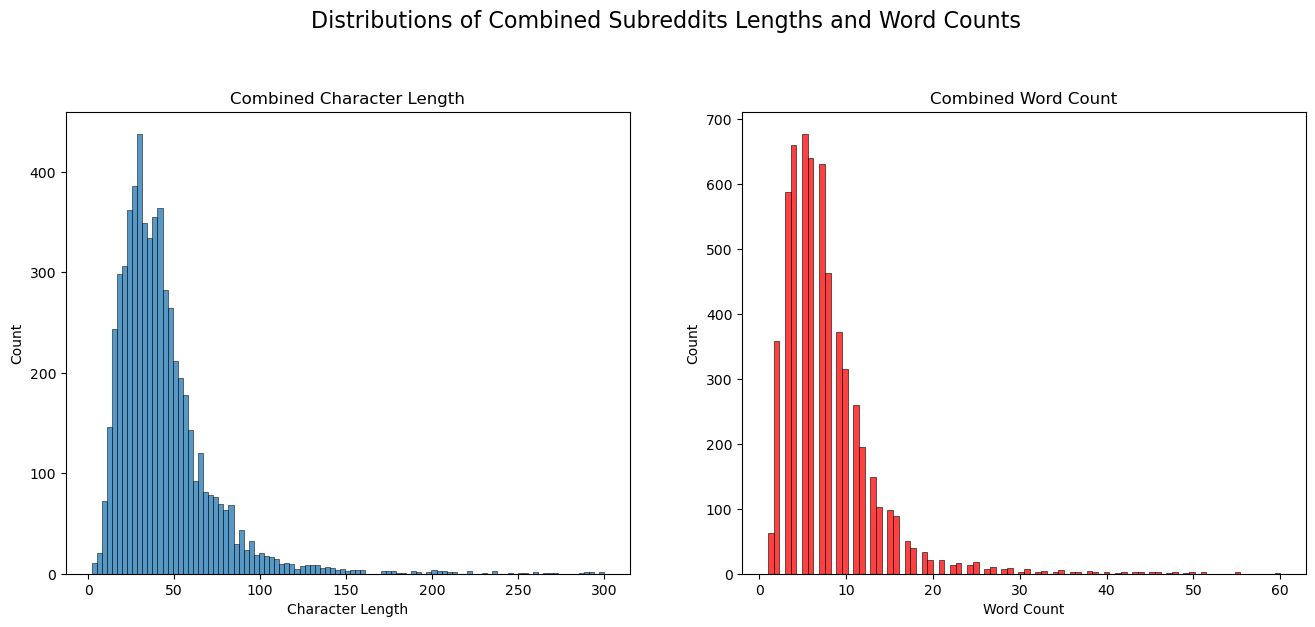

In [17]:
# derived from 5.05 lesson
fig, ax =  plt.subplots(1, 2, figsize=(16,6))

sns.histplot(combined['length'],ax=ax[0])
sns.histplot(combined['word_count'], ax=ax[1], color = 'red')

ax[0].set(xlabel='Character Length', title = 'Combined Character Length')
ax[1].set(xlabel='Word Count', title = 'Combined Word Count')

fig.suptitle('Distributions of Combined Subreddits Lengths and Word Counts', fontsize = 16, y = 1.05);

In [59]:
# create word counts for each subreddit
cycling_word_count = combined[combined['subreddit'] == 'cycling']['word_count']
running_word_count = combined[combined['subreddit'] == 'running']['word_count']

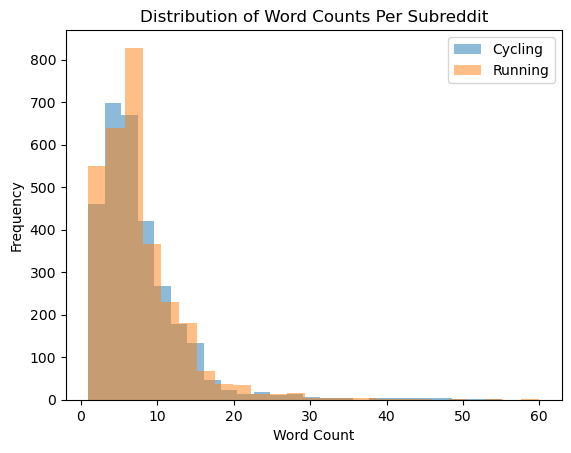

In [49]:
# distribution of word counts for each subreddit
plt.hist(cycling_word_count, bins = 25, alpha = 0.5, label = 'Cycling')
plt.hist(running_word_count, bins = 25, alpha = 0.5, label = 'Running')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts Per Subreddit')
plt.legend()
plt.savefig('../imgs/word_count.png');
plt.show()

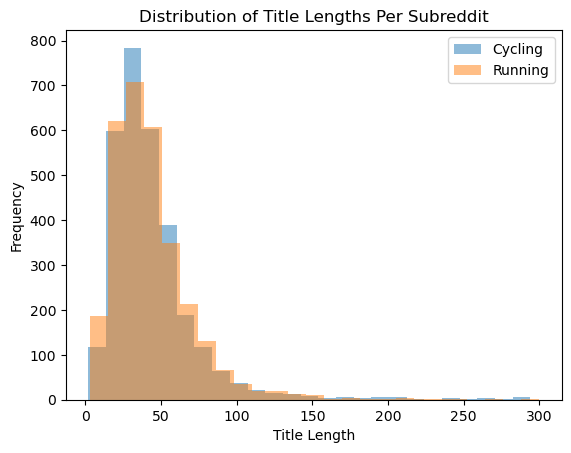

In [50]:
# distribution of title lengths for each subreddit
cycling_lengths = combined[combined['subreddit'] == 'cycling']['length']
running_lengths = combined[combined['subreddit'] == 'running']['length']

plt.hist(cycling_lengths, bins = 25, alpha=0.5, label = 'Cycling')
plt.hist(running_lengths, bins = 25, alpha=0.5, label = 'Running')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Distribution of Title Lengths Per Subreddit')
plt.legend()
plt.savefig('../imgs/length.png');
plt.show()

**Initial Observations**
- Both of the distributions seem to be asymmetrical and skewed right, so they have a mean greater than the median. There are a lot of posts with smaller lengths and counts, but some very large posts.

- Between the two subreddits, /r/running does have a slightly higher average title length and title word count.

## Top Words Analysis 

In [21]:
cv = CountVectorizer(stop_words = 'english')

In [22]:
cycling_cv = cv.fit_transform(cycling['title'])
cycling_cv_df = pd.DataFrame(cycling_cv.todense(), columns = cv.get_feature_names_out())

In [23]:
running_cv = cv.fit_transform(running['title'])
running_cv_df = pd.DataFrame(running_cv.todense(), columns = cv.get_feature_names_out())

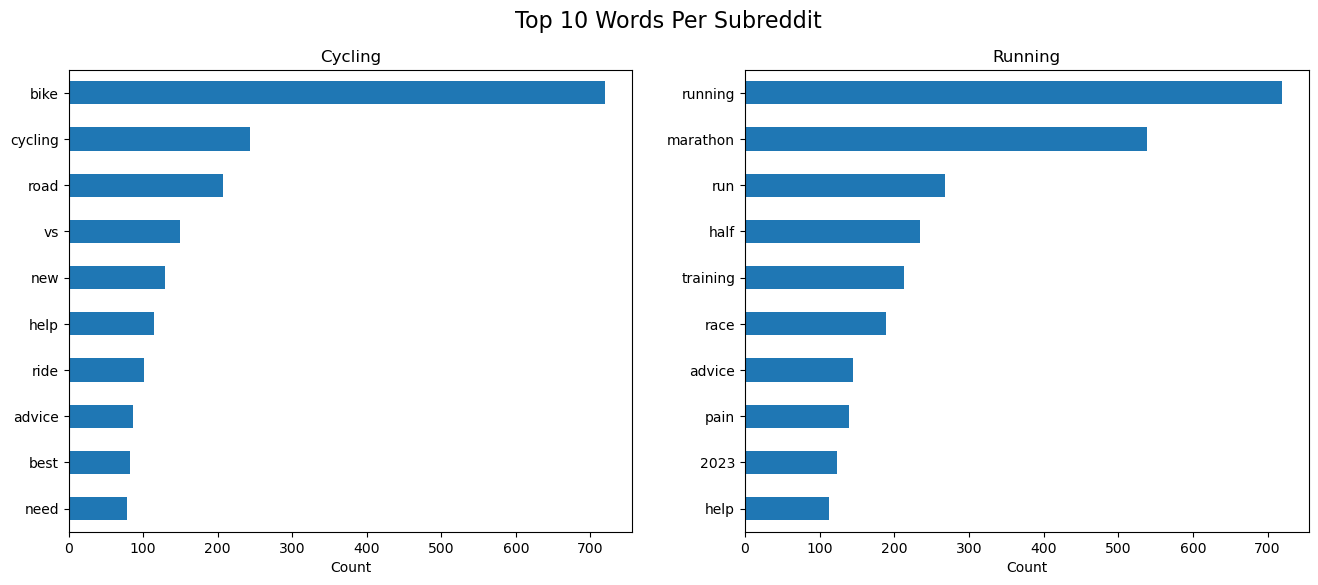

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

cycling_cv_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[0])
running_cv_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax = ax[1])

ax[0].set(xlabel = 'Count', title = 'Cycling')
ax[1].set(xlabel = 'Count', title = 'Running')

ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words Per Subreddit', fontsize = 16);

plt.savefig('../imgs/top10words.png');

- It seems that /r/cycling is more focused on posts for upgrades on gear, hence the words like 'vs.', 'new', 'best', which all suggest comparisons. The running subreddit seems more focused on individual performance, with words like 'marathon', 'training', 'race', and 'pain'. 


## Top Bigrams 

In [25]:
# derived from 5.05 nlp lesson

cv = CountVectorizer(stop_words='english', ngram_range=(2,2))

cycling_vect = cv.fit_transform(cycling['title'])
cycling_vect_df = pd.DataFrame(cycling_vect.todense(), columns=cv.get_feature_names_out())

running_vect = cv.fit_transform(running['title'])
running_vect_df = pd.DataFrame(running_vect.todense(), columns=cv.get_feature_names_out())

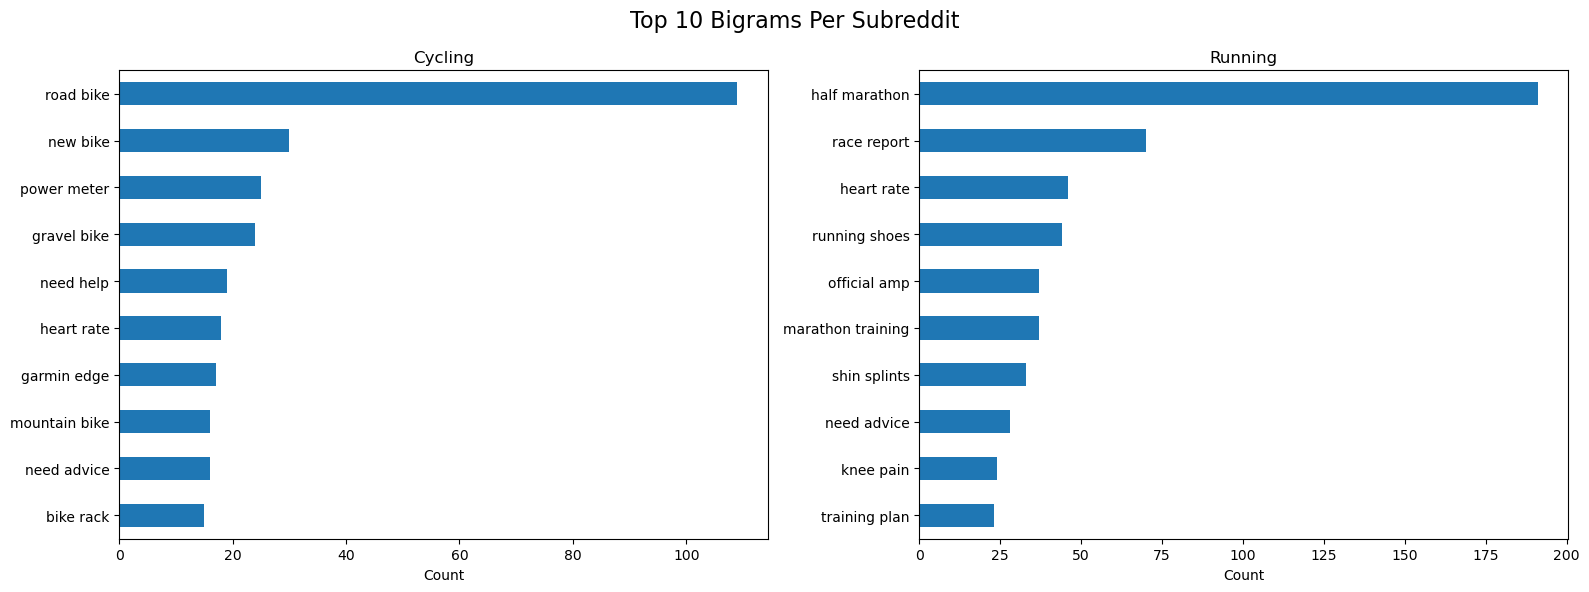

In [58]:
# derived from 5.05 nlp lesson

fig, ax = plt.subplots(1, 2, figsize=(16,6))
cycling_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0])
running_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1])

ax[0].set(xlabel = 'Count', title = 'Cycling')
ax[1].set(xlabel = 'Count', title = 'Running')

ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.tight_layout()

fig.suptitle('Top 10 Bigrams Per Subreddit', fontsize = 16)
plt.tight_layout()
plt.savefig('../imgs/top10bigrams.png');

- With the bigrams, or consecutive words, the distributions seem to confirm that /r/cycling is more focused on equipment upgrades, with  bigrams like 'new bike', 'power meter', 'garmin edge' (a bike computer) and 'bike rack.' Running seems to be more talkative about individual performance with bigrams like 'half marathon', 'race report', 'shin splints', 'knee pain', and 'training plan.' In fact, the only thing that stands out from the rest is 'running shoes.'
